#### 📁 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('autonomous_driving.csv')
df.head()

,vehicle_id,timestamp,speed_kmh,acceleration_mps2,steering_angle_deg,location_lat,location_lon,obstacles_detected,weather_condition,lane_position
0,1,2025-04-14T00:00:00Z,60,2.5,5.0,37.7749,-122.4194,False,Clear,1
1,2,2025-04-14T00:01:00Z,45,1.8,-3.0,37.7750,-122.4195,True,Rainy,2
2,3,2025-04-14T00:02:00Z,70,3.2,2.0,37.7751,-122.4196,False,Foggy,1
3,4,2025-04-14T00:03:00Z,55,-1.2,-7.5,37.7752,-122.4197,True,Clear,3
4,5,2025-04-14T00:04:00Z,30,0.5,0.0,37.7753,-122.4198,False,Clear,1


#### Data Preprocessing

###### Encoding and feature processing: time stamp into h/m and encode weather conditions

In [2]:
df['hour'] =pd.to_datetime(df['timestamp']).dt.hour

df =pd.get_dummies(df, columns=['weather_condition', 'lane_position'])

#### Feature selection

In [3]:
encoded_features = [col for col in df.columns if col.startswith('weather_') or col.startswith('lane_')]

# define all feature list

features = [
    'speed_kmh','location_lat', 'location_lon','obstacles_detected','hour',
    # plus encoded weather and lane_position columns
] + encoded_features

# define target

target = ['steering_angle_deg', 'acceleration_mps2']

X = df.drop(columns=target + ['timestamp', 'vehicle_id'])


# Check the new columns
df.head()

,vehicle_id,timestamp,speed_kmh,acceleration_mps2,steering_angle_deg,location_lat,location_lon,obstacles_detected,hour,weather_condition_Clear,weather_condition_Foggy,weather_condition_Rainy,lane_position_1,lane_position_2,lane_position_3
0,1,2025-04-14T00:00:00Z,60,2.5,5.0,37.7749,-122.4194,False,0,True,False,False,True,False,False
1,2,2025-04-14T00:01:00Z,45,1.8,-3.0,37.7750,-122.4195,True,0,False,False,True,False,True,False
2,3,2025-04-14T00:02:00Z,70,3.2,2.0,37.7751,-122.4196,False,0,False,True,False,True,False,False
3,4,2025-04-14T00:03:00Z,55,-1.2,-7.5,37.7752,-122.4197,True,0,True,False,False,False,False,True
4,5,2025-04-14T00:04:00Z,30,0.5,0.0,37.7753,-122.4198,False,0,True,False,False,True,False,False


#### Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


#### Model Training

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# Initialize the model
model = MultiOutputRegressor(LinearRegression())


# Train the model
model.fit(X_train, y_train)

# Make predictions
pred = model.predict(X_test)


#### Evaluation

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.5201160148884204
Root Mean Squared Error (RMSE): 0.7851865743296598
R-squared (R²): 0.978891082968153


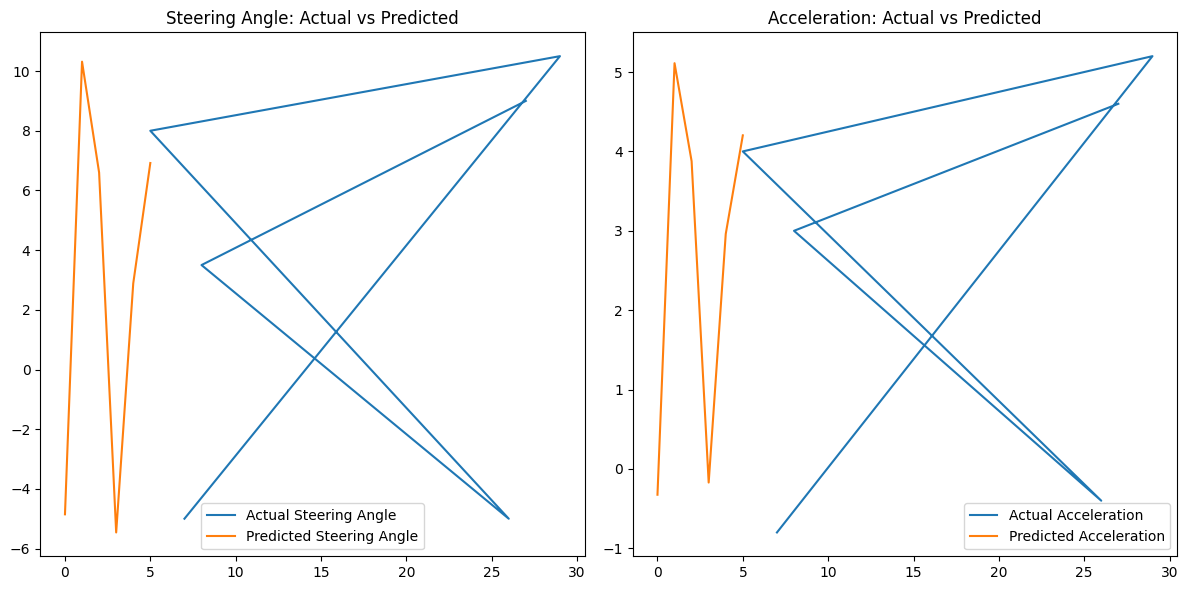

In [7]:
import matplotlib.pyplot as plt

# Assuming 'pred' contains predictions for both target columns
steering_pred = pred[:, 0]
accel_pred = pred[:, 1]

# Actual values
steering_actual = y_test.iloc[:, 0]
accel_actual = y_test.iloc[:, 1]

# Plot steering angle predictions vs actual
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(steering_actual, label="Actual Steering Angle")
plt.plot(steering_pred, label="Predicted Steering Angle")
plt.legend()
plt.title("Steering Angle: Actual vs Predicted")

# Plot acceleration predictions vs actual
plt.subplot(1, 2, 2)
plt.plot(accel_actual, label="Actual Acceleration")
plt.plot(accel_pred, label="Predicted Acceleration")
plt.legend()
plt.title("Acceleration: Actual vs Predicted")

plt.tight_layout()
plt.show()


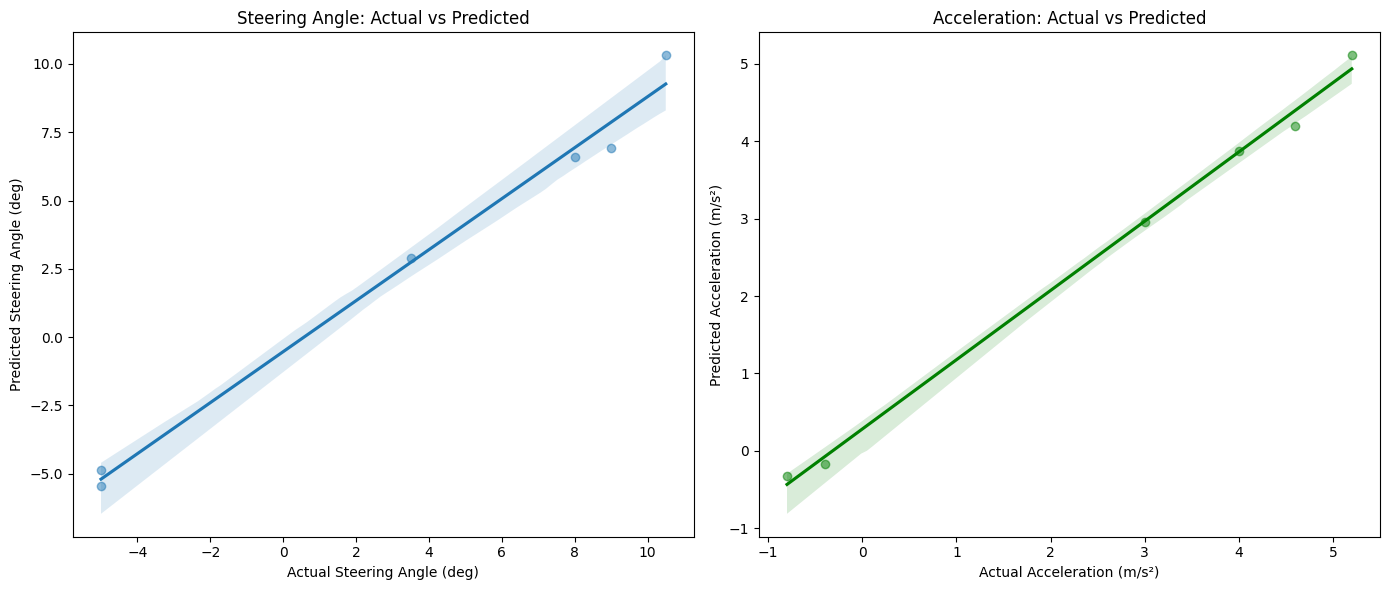

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for actual vs predicted values
results_df = pd.DataFrame({
    'Actual_Steering': y_test.iloc[:, 0],
    'Predicted_Steering': pred[:, 0],
    'Actual_Accel': y_test.iloc[:, 1],
    'Predicted_Accel': pred[:, 1]
})

# Plot for Steering Angle
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='Actual_Steering', y='Predicted_Steering', data=results_df, scatter_kws={"alpha": 0.5})
plt.title('Steering Angle: Actual vs Predicted')
plt.xlabel('Actual Steering Angle (deg)')
plt.ylabel('Predicted Steering Angle (deg)')

# Plot for Acceleration
plt.subplot(1, 2, 2)
sns.regplot(x='Actual_Accel', y='Predicted_Accel', data=results_df, scatter_kws={"alpha": 0.5}, color='green')
plt.title('Acceleration: Actual vs Predicted')
plt.xlabel('Actual Acceleration (m/s²)')
plt.ylabel('Predicted Acceleration (m/s²)')

plt.tight_layout()
plt.show()


In [10]:
import os
import joblib

# Make sure the models directory exists
os.makedirs('models', exist_ok=True)

# Save the trained model
joblib.dump(model, 'models/steering_accel_model.pkl')


['models/steering_accel_model.pkl']

In [11]:
import joblib

# Train your model
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(LinearRegression())
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'models/steering_accel_model.pkl')



['models/steering_accel_model.pkl']

In [12]:
# Load the saved model
model = joblib.load('models/steering_accel_model.pkl')

# Use it for predictions
predictions = model.predict(X_test)
